Hello myself Siddharth Sutar.. 
This is my project which can classify upto 40 fishes currently using fine tunning(A method in which pre-trained model is used). I am happy that I will be sharing this project with you! Hope you will find it helpful.

Importing the requirements tensorflow, keras and matplotlib and many more

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
print("Done")

Done


Let's see the images. Please take a note that these images are taken from kaggle's fish dataset. They seem nice and cropped.

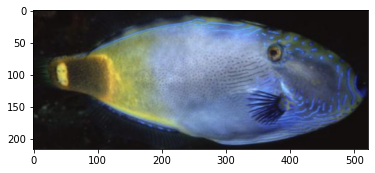

In [15]:
# img = tf.keras.preprocessing.image.load_img("D:/AL ML Project/Fish Detection Project/fishdectproj/train/acanthaluteres_brownii/acanthaluteres_brownii_3.png")
img = tf.keras.preprocessing.image.load_img("./train/acanthaluteres_brownii/acanthaluteres_brownii_3.png")
plt.imshow(img)



Let's make train and validation datasets. This is to find out the exact number of training and validation images. In this case it will be x training images and y validation images.

In [3]:
img_width = 299
img_height = 299
nbr_epochs = 25
batch_size = 32

# Names of fishes  
class_name = ['A73EGS-p','acanthaluteres_brownii','acanthaluteres_spilomelanurus','acanthaluteres_vittiger','acanthistius_cinctus','acanthopagrus_australis','acanthopagrus_berda','acanthopagrus_latus','achoerodus_gouldii','achoerodus_viridis','acreichthys_tomentosus','aesopia_cornuta','aethaloperca_rogaa','alectis_ciliaris','alectis_indica','alepes_kleinii','aluterus_monoceros','aluterus_scriptus','amanses_scopas','anampses_caeruleopunctatus','anampses_elegans','anampses_femininus','anampses_geographicus','anampses_lennardi','anampses_melanurus','anampses_meleagrides','anampses_neoguinaicus','anampses_twistii','anodontostoma_chacunda','anyperodon_leucogrammicus','aphareus_furca','aphareus_rutilans','aprion_virescens','argyrops_spinifer','aseraggodes_melanostictus','atractoscion_aequidens','atule_mate','auxis_rochei','auxis_thazard','bathylagichthys_greyae']

print(class_name)


['A73EGS-p', 'acanthaluteres_brownii', 'acanthaluteres_spilomelanurus', 'acanthaluteres_vittiger', 'acanthistius_cinctus', 'acanthopagrus_australis', 'acanthopagrus_berda', 'acanthopagrus_latus', 'achoerodus_gouldii', 'achoerodus_viridis', 'acreichthys_tomentosus', 'aesopia_cornuta', 'aethaloperca_rogaa', 'alectis_ciliaris', 'alectis_indica', 'alepes_kleinii', 'aluterus_monoceros', 'aluterus_scriptus', 'amanses_scopas', 'anampses_caeruleopunctatus', 'anampses_elegans', 'anampses_femininus', 'anampses_geographicus', 'anampses_lennardi', 'anampses_melanurus', 'anampses_meleagrides', 'anampses_neoguinaicus', 'anampses_twistii', 'anodontostoma_chacunda', 'anyperodon_leucogrammicus', 'aphareus_furca', 'aphareus_rutilans', 'aprion_virescens', 'argyrops_spinifer', 'aseraggodes_melanostictus', 'atractoscion_aequidens', 'atule_mate', 'auxis_rochei', 'auxis_thazard', 'bathylagichthys_greyae']


Why making validation set instead of test?
-> Answer is simple while using kaggle dataset it is preffered to have validation and train datasets

In [4]:
import shutil

root_train = 'D:/AL ML Project/Fish Detection Project/fishdectproj/train_split'
root_val = 'D:/AL ML Project/Fish Detection Project/fishdectproj/val_split'

root_total = './train'

FishNames = class_name

nbr_train_samples = 0
nbr_val_samples = 0

# Training proportion so technically it means 80 percent images for training and 20 percent for validation
split_proportion = 0.75

for fish in FishNames:
    if fish not in os.listdir(root_train):
        os.mkdir(os.path.join(root_train, fish)) # Joins fishs name to the path

    total_images = os.listdir(os.path.join(root_total, fish))

    nbr_train = int(len(total_images) * split_proportion)

    np.random.shuffle(total_images)

    train_images = total_images[:nbr_train]

    val_images = total_images[nbr_train:]

    for img in train_images:
        source = os.path.join(root_total, fish, img)
        target = os.path.join(root_train, fish, img)
        shutil.copy(source, target)
        nbr_train_samples += 1

    if fish not in os.listdir(root_val):
        os.mkdir(os.path.join(root_val, fish))

    for img in val_images:
        source = os.path.join(root_total, fish, img)
        target = os.path.join(root_val, fish, img)
        shutil.copy(source, target)
        nbr_val_samples += 1

print('Finish splitting train and val images!')
print('# training samples: {}, # val samples: {}'.format(nbr_train_samples, nbr_val_samples))

Finish splitting train and val images!
# training samples: 233, # val samples: 96


In [5]:
%pip install tensorflow==1.15.5 
# The reason why this is here is because I tried  using tensorflow 1.15.5 but it doesn't seem to work as their is some issues with my environments the jupiter one and python one. 

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


Welcome to the actual training part...

We will be using Inception V3 model here for traning. Inception-v3 is a pre-trained convolutional neural network model that is 48 layers deep. It is a version of the network already trained on more than a million images from the ImageNet database. It is the third edition of Inception CNN model by Google.

Here in Inception-v3 model almost an accuracy of 78.1 to 93.5 is possible to attend. henceforth we will be using Inception-v3 model.

In [19]:
# Please run this more than once to have better results when the model predicts
import re
from keras.models import Sequential
from keras.layers import  Dense, GlobalAveragePooling2D

from keras.applications.inception_v3 import InceptionV3

# Image width and height are accurately needed to be 299 as per as the input of the model

img_width = 299
img_height = 299



# all training images
images_dir = 'D:/AL ML Project/Fish Detection Project/fishdectproj/train'
for images in images_dir:
    i = 0
    newListImg = []
    while(i < 40):
        images_dir_main = f'D:/AL ML Project/Fish Detection Project/fishdectproj/train/{class_name[i]}'
        i = i + 1
        list_img = [images_dir_main+f for f in os.listdir(images_dir_main) if re.search('png|PNG', f)]
        newListImg.append(list_img)

# if top is not included then input shape must be 299,299,3
InceptionV3_notop = InceptionV3(include_top=False, weights='imagenet',
                    input_tensor=None, input_shape=(299, 299, 3)) # image width, height, channels


import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 27

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 2048))  # Must be equal to the output of the InceptionV3
    labels = np.zeros(shape=(sample_count,40)) # 40 is the number of fishes that are in my dataset currently
    # Preprocess data using datagen as it automatically analyzes the data to improve our CNN network
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
    # Pass data through InceptionV3 i.e our model
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = InceptionV3_notop.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(root_train, 324)  
validation_features, validation_labels = extract_features(root_val, 135)
print('done!')

Found 329 images belonging to 40 classes.
1/1 [==============================] - 2s 2s/step
Found 329 images belonging to 40 classes.
1/1 [==============================] - 2s 2s/step
done!


The Math Behind

from the above splitting we got like 233 images for training and 

27 is the batch size so here it becomes
324/27 = 12 (Training dataset)
135/27 = 5 (Validation dataset)

training and validation images must be below 329 mark and must be divisible by batch size otherwise model fails, also the features and labels are exracted by passing images to the model itself as you can see in the code above.

why 324 for training?
There is a concept named overfitting in data science in order to avoid this problem I have to train my model using more images so you see total images where like 329 the close number to it divisible by 27 is 324

In [112]:
InceptionV3_notop.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1504 (Conv2D)           (None, 149, 149, 32  864         ['input_17[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1504 (Batc  (None, 149, 149, 32  96         ['conv2d_1504[0][0]']            
 hNormalization)                )                                                      

In [17]:
# print(train_labels)
# print(train_features)
# print(validation_labels)
# print(validation_features)
print(validation_features.shape)

(135, 8, 8, 2048)


for making our own model will need GlobalAveragePooling 2D for calculating the average output of each feature map in the previous layer. This fairly simple operation reduces the data significantly and prepares the model for the final classification layer.

A Dense layer is needed for changing the dimension of the output by performing matrix vector multiplication at the last

In [20]:
epochs = 150 # This is the number of times our model will see through images 

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(8,8,2048))) 
# We are creating an input funnel for model. 8,8,2048 is the output for inception-ve model we are basically matcing i/p and o/p for our model
model.add(Dense(40, activation='softmax'))
# a dense layer below for the betterment of the input
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 40)                81960     
                                                                 
Total params: 81,960
Trainable params: 81,960
Non-trainable params: 0
_________________________________________________________________


We will be fitting inception-v3 model into our model in order to train it basically by using model.fit method
This gives us the accuracy and loss which we are looking for.

In [21]:
from keras.callbacks import ModelCheckpoint
# this line gives us validation loss and accuracy alongside training accuray it also keeps a track on val_loss
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

# Compile model
from keras.optimizers import Adam
model.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['acc'])

#Categorical Cross-Entropy loss Also called Softmax Loss. It is a Softmax activation plus a Cross-Entropy loss. If we use this loss, we will train a CNN to output a probability over the C C classes for each image.

# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

Epoch 1/150
 8/12 [===================>..........] - ETA: 0s - loss: 3.8348 - acc: 0.0463    
Epoch 1: val_loss improved from inf to 3.00922, saving model to model-001-0.067901-0.111111.h5
12/12 [==============================] - 1s 26ms/step - loss: 3.7205 - acc: 0.0679 - val_loss: 3.0092 - val_acc: 0.1111
Epoch 2/150
 9/12 [=====================>........] - ETA: 0s - loss: 2.9496 - acc: 0.2469
Epoch 2: val_loss improved from 3.00922 to 2.30093, saving model to model-002-0.290123-0.540741.h5
12/12 [==============================] - 0s 13ms/step - loss: 2.8548 - acc: 0.2901 - val_loss: 2.3009 - val_acc: 0.5407
Epoch 3/150
 8/12 [===================>..........] - ETA: 0s - loss: 2.2875 - acc: 0.5139
Epoch 3: val_loss improved from 2.30093 to 1.78947, saving model to model-003-0.506173-0.711111.h5
12/12 [==============================] - 0s 25ms/step - loss: 2.2556 - acc: 0.5062 - val_loss: 1.7895 - val_acc: 0.7111
Epoch 4/150
 9/12 [=====================>........] - ETA: 0s - loss: 1.79

In [51]:
#Saving the model if val_loss is less than 0.009

#for model learned about 40 classes
import pickle
with open('model_40','wb') as f:
    pickle.dump(model,f)

model.save('Model140.h5')
print('Model Saved!')

INFO:tensorflow:Assets written to: ram://65c12956-05bc-424a-a3de-db752414bc66/assets


In [10]:
# load model
savedModel=tf.keras.models.load_model('Model140.h5')
savedModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 40)                81960     
                                                                 
Total params: 81,960
Trainable params: 81,960
Non-trainable params: 0
_________________________________________________________________


Wow an acurracy of 100% is achecived

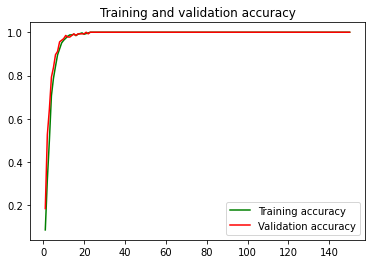

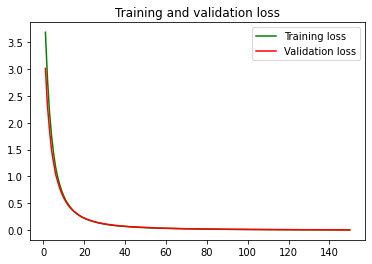

In [11]:
# Plot results to see how good is over model
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Above Graphs are plotted to see how well our model performed on training data and validation data

The closer the lines the better the performance of model in prediction! 
Lowering the loss is the main objective here

In [12]:
#Use for only training
from keras.preprocessing import image
from keras.utils import img_to_array 
def prediction(img_path):
    org_img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()


    # Extract features from the model itself and passing it to our model below
    features = InceptionV3_notop.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = model.predict(features)
    except:
        prediction = model.predict(features.reshape(1, 8*8*2048)) 
    #if something went wrong we will change the shape of array to 1 as its for 1 prediction, 8,8,2048 comes from the o/p of inception v3

    classes = class_name
    print("Here we have got..."+str(classes[np.argmax(np.array(prediction[0]))]))

In [12]:
#Use when you have saved model
from keras.preprocessing import image
from keras.utils import img_to_array 
def prediction(img_path):
    org_img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()


    # Extract features from the model itself and passing it to our model below
    features = InceptionV3_notop.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = savedModel.predict(features)
    except:
        prediction = savedModel.predict(features.reshape(1, 8*8*2048))

    classes = class_name
    print("Here we have got..."+str(classes[np.argmax(np.array(prediction[0]))]))

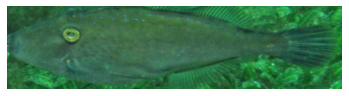

1/1 [==============================] - 0s 41ms/step
Here we have got...acanthaluteres_brownii
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/acanthaluteres_brownii_4.png


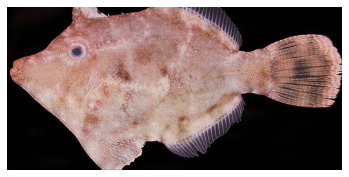

1/1 [==============================] - 0s 24ms/step
Here we have got...acreichthys_tomentosus
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/acreichthys_tomentosus_1.png


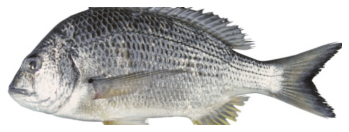

1/1 [==============================] - 0s 16ms/step
Here we have got...acanthopagrus_australis
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/acanthopagrus_australis_3.png


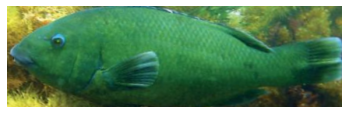

1/1 [==============================] - 0s 19ms/step
Here we have got...achoerodus_gouldii
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/achoerodus_gouldii_3.png


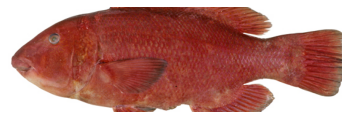

1/1 [==============================] - 0s 15ms/step
Here we have got...achoerodus_viridis
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/achoerodus_viridis_6.png


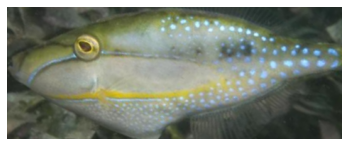

1/1 [==============================] - 0s 14ms/step
Here we have got...acanthaluteres_spilomelanurus
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/acanthaluteres_spilomelanurus_2.png


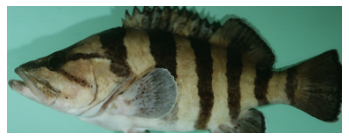

1/1 [==============================] - 0s 11ms/step
Here we have got...acanthistius_cinctus
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/acanthistius_cinctus_4.png


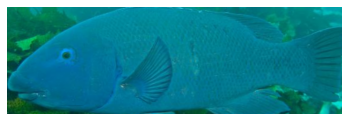

1/1 [==============================] - 0s 15ms/step
Here we have got...achoerodus_viridis
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/achoerodus_viridis_3.png


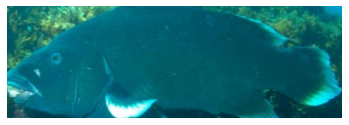

1/1 [==============================] - 0s 17ms/step
Here we have got...achoerodus_gouldii
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/achoerodus_gouldii_2.png


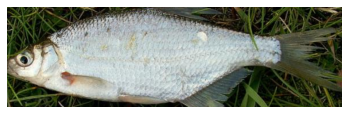

1/1 [==============================] - 0s 15ms/step
Here we have got...acanthopagrus_australis
D:/AL ML Project/Fish Detection Project/fishdectproj/predict/acanthopagrus_australis_6.png


In [13]:
pred_dir = "D:/AL ML Project/Fish Detection Project/fishdectproj/predict/"
import random
pred_files = random.sample(os.listdir(pred_dir),10)
for f in pred_files:
    prediction(pred_dir+f)
    print(pred_dir+f)



References: 
1)https://github.com/TusharGupta01/Fish-Identification
2)https://www.kaggle.com/datasets/sripaadsrinivasan/fish-species-image-data?resource=download
3)https://www.geeksforgeeks.org/convolutional-neural-network-cnn-in-machine-learning/
4)https://medium.com/big-data-at-berkeley/choosing-fine-tuning-your-machine-learning-model-8c28fc1bd2fc